<a href="https://colab.research.google.com/github/adithyabalakumar/EVA-4/blob/master/S9/s9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/Colab\ Notebooks/S9/

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Colab Notebooks/S9


In [2]:
!pip install albumentations

# Import Libraries

In [0]:
%matplotlib inline
import torch
import torchvision
import matplotlib.pyplot as plt
import numpy as np

# Import loader

* Initialize train and test loaders from train and test dataset respectively

* CUDA check

In [4]:
import loader

# Initialize CIFAR-10 classes
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck') 

Files already downloaded and verified
Files already downloaded and verified
CUDA Available? True


# Plot training images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


plane   dog  deer  deer


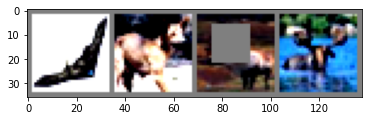

In [5]:
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get some random training images
dataiter = iter(loader.trainloader_for_plot)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

# Import model

Initialize network for the model

In [0]:
import model

# Model parameters

In [7]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(f"Device: {device}")
net = model.ResNet18().to(device)
summary(net, input_size=(3, 32, 32))

Device: cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
           Dropout-5           [-1, 64, 32, 32]               0
            Conv2d-6           [-1, 64, 32, 32]          36,864
       BatchNorm2d-7           [-1, 64, 32, 32]             128
        BasicBlock-8           [-1, 64, 32, 32]               0
            Conv2d-9           [-1, 64, 32, 32]          36,864
      BatchNorm2d-10           [-1, 64, 32, 32]             128
          Dropout-11           [-1, 64, 32, 32]               0
           Conv2d-12           [-1, 64, 32, 32]          36,864
      BatchNorm2d-13           [-1, 64, 32, 32]             128
       BasicBlock-14      

# Loss function and optimizer



In [0]:
import torch.nn as nn
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)


# Training and Testing

In [0]:
import train
import test

# Training and testing our model

In [10]:
epochs = 30
last_epoch=False

for epoch in range(epochs):
  train.train(net, device, loader.trainloader, optimizer, criterion, epoch)
  if epoch == epochs - 1:
    last_epoch = True
  test.test(net, device, loader.testloader, criterion,last_epoch)

Epoch= 0 Loss=1.1639680862426758 Batch_id=781 Accuracy=47.67: 100%|██████████| 782/782 [00:35<00:00, 22.07it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0166, Accuracy: 6245/10000 (62.45%)



Epoch= 1 Loss=1.1497266292572021 Batch_id=781 Accuracy=65.67: 100%|██████████| 782/782 [00:35<00:00, 22.30it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0129, Accuracy: 7200/10000 (72.00%)



Epoch= 2 Loss=0.6739906072616577 Batch_id=781 Accuracy=73.01: 100%|██████████| 782/782 [00:34<00:00, 22.41it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0103, Accuracy: 7717/10000 (77.17%)



Epoch= 3 Loss=0.5636544823646545 Batch_id=781 Accuracy=77.36: 100%|██████████| 782/782 [00:34<00:00, 22.74it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0089, Accuracy: 8041/10000 (80.41%)



Epoch= 4 Loss=0.7749453783035278 Batch_id=781 Accuracy=79.96: 100%|██████████| 782/782 [00:34<00:00, 22.63it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0104, Accuracy: 7792/10000 (77.92%)



Epoch= 5 Loss=0.5554369688034058 Batch_id=781 Accuracy=81.72: 100%|██████████| 782/782 [00:34<00:00, 22.79it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0077, Accuracy: 8326/10000 (83.26%)



Epoch= 6 Loss=0.44308698177337646 Batch_id=781 Accuracy=83.63: 100%|██████████| 782/782 [00:34<00:00, 22.62it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0085, Accuracy: 8216/10000 (82.16%)



Epoch= 7 Loss=1.180245280265808 Batch_id=781 Accuracy=85.01: 100%|██████████| 782/782 [00:34<00:00, 22.63it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0073, Accuracy: 8471/10000 (84.71%)



Epoch= 8 Loss=0.8665065169334412 Batch_id=781 Accuracy=86.00: 100%|██████████| 782/782 [00:34<00:00, 22.75it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0072, Accuracy: 8481/10000 (84.81%)



Epoch= 9 Loss=0.33879026770591736 Batch_id=781 Accuracy=87.07: 100%|██████████| 782/782 [00:34<00:00, 22.58it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0066, Accuracy: 8595/10000 (85.95%)



Epoch= 10 Loss=0.1459626853466034 Batch_id=781 Accuracy=88.29: 100%|██████████| 782/782 [00:34<00:00, 22.78it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0074, Accuracy: 8498/10000 (84.98%)



Epoch= 11 Loss=0.5006439089775085 Batch_id=781 Accuracy=89.07: 100%|██████████| 782/782 [00:34<00:00, 22.53it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0065, Accuracy: 8665/10000 (86.65%)



Epoch= 12 Loss=0.29612329602241516 Batch_id=781 Accuracy=89.82: 100%|██████████| 782/782 [00:34<00:00, 22.70it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0065, Accuracy: 8628/10000 (86.28%)



Epoch= 13 Loss=0.30010026693344116 Batch_id=781 Accuracy=90.53: 100%|██████████| 782/782 [00:34<00:00, 22.55it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0064, Accuracy: 8665/10000 (86.65%)



Epoch= 14 Loss=0.31239500641822815 Batch_id=781 Accuracy=90.87: 100%|██████████| 782/782 [00:34<00:00, 22.67it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0061, Accuracy: 8793/10000 (87.93%)



Epoch= 15 Loss=0.0770455002784729 Batch_id=781 Accuracy=91.79: 100%|██████████| 782/782 [00:34<00:00, 22.63it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0065, Accuracy: 8757/10000 (87.57%)



Epoch= 16 Loss=0.1447494626045227 Batch_id=781 Accuracy=92.39: 100%|██████████| 782/782 [00:34<00:00, 22.56it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0064, Accuracy: 8747/10000 (87.47%)



Epoch= 17 Loss=0.3921184241771698 Batch_id=781 Accuracy=92.58: 100%|██████████| 782/782 [00:34<00:00, 22.37it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0072, Accuracy: 8666/10000 (86.66%)



Epoch= 18 Loss=0.5573431849479675 Batch_id=781 Accuracy=93.25: 100%|██████████| 782/782 [00:34<00:00, 22.48it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0068, Accuracy: 8765/10000 (87.65%)



Epoch= 19 Loss=0.6379214525222778 Batch_id=781 Accuracy=93.49: 100%|██████████| 782/782 [00:35<00:00, 22.31it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0067, Accuracy: 8797/10000 (87.97%)



Epoch= 20 Loss=0.6920634508132935 Batch_id=781 Accuracy=93.89: 100%|██████████| 782/782 [00:34<00:00, 22.43it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0069, Accuracy: 8785/10000 (87.85%)



Epoch= 21 Loss=0.235602468252182 Batch_id=781 Accuracy=94.21: 100%|██████████| 782/782 [00:34<00:00, 22.56it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0070, Accuracy: 8756/10000 (87.56%)



Epoch= 22 Loss=0.09766280651092529 Batch_id=781 Accuracy=94.39: 100%|██████████| 782/782 [00:35<00:00, 21.82it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0063, Accuracy: 8871/10000 (88.71%)



Epoch= 23 Loss=0.3208083212375641 Batch_id=781 Accuracy=94.74: 100%|██████████| 782/782 [00:36<00:00, 21.65it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0062, Accuracy: 8898/10000 (88.98%)



Epoch= 24 Loss=0.011108756065368652 Batch_id=781 Accuracy=95.13: 100%|██████████| 782/782 [00:35<00:00, 22.02it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0066, Accuracy: 8852/10000 (88.52%)



Epoch= 25 Loss=0.052571266889572144 Batch_id=781 Accuracy=95.21: 100%|██████████| 782/782 [00:36<00:00, 21.61it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0065, Accuracy: 8860/10000 (88.60%)



Epoch= 26 Loss=0.40950319170951843 Batch_id=781 Accuracy=95.54: 100%|██████████| 782/782 [00:35<00:00, 21.86it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0065, Accuracy: 8949/10000 (89.49%)



Epoch= 27 Loss=0.03643423318862915 Batch_id=781 Accuracy=95.66: 100%|██████████| 782/782 [00:35<00:00, 21.81it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0066, Accuracy: 8902/10000 (89.02%)



Epoch= 28 Loss=0.6829590201377869 Batch_id=781 Accuracy=96.01: 100%|██████████| 782/782 [00:35<00:00, 21.79it/s]
  0%|          | 0/782 [00:00<?, ?it/s]


Validation set: Average loss: 0.0072, Accuracy: 8868/10000 (88.68%)



Epoch= 29 Loss=0.0921439528465271 Batch_id=781 Accuracy=95.96: 100%|██████████| 782/782 [00:34<00:00, 22.50it/s]



Validation set: Average loss: 0.0075, Accuracy: 8800/10000 (88.00%)



# Result visualization

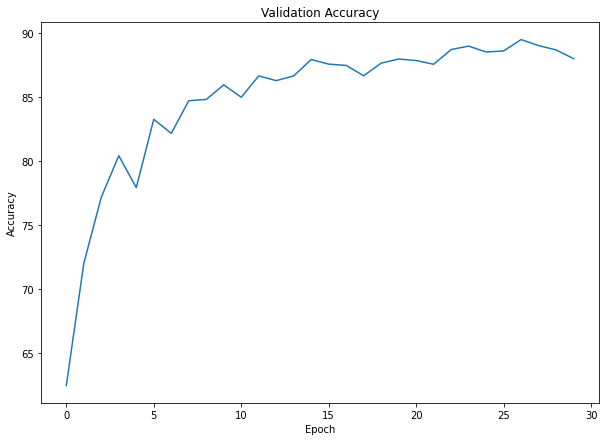

In [11]:
val_acc_fig, axs = plt.subplots(1,1,figsize=(10,7))
axs.plot(test.test_acc)
axs.set_title("Validation Accuracy")
axs.set_xlabel("Epoch")
axs.set_ylabel("Accuracy")
val_acc_fig.savefig('/content/gdrive/My Drive/Colab Notebooks/S9/validation_accuracy_change_plot.jpg')

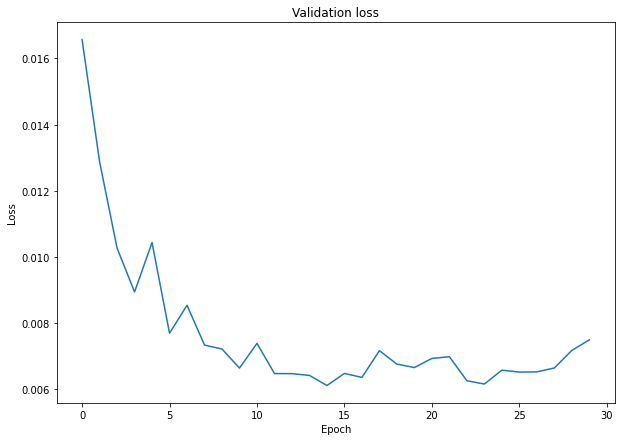

In [12]:
val_loss_fig, axs = plt.subplots(1,1,figsize=(10,7))

axs.plot(test.test_losses)
axs.set_title("Validation loss")
axs.set_xlabel("Epoch")
axs.set_ylabel("Loss")
val_loss_fig.savefig('/content/gdrive/My Drive/Colab Notebooks/S9/validation_loss_change_plot.jpg')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GroundTruth:    dog horse   car  deer


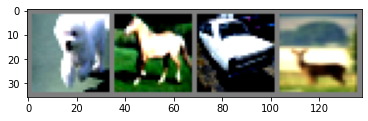

In [13]:
dataiter = iter(loader.testloader_for_plot)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

Okay, now let us see what the neural network thinks these examples above are:



In [0]:
outputs = net(images.cuda())

The outputs are energies for the 10 classes.
Higher the energy for a class, the more the network
thinks that the image is of the particular class.
So, let's get the index of the highest energy:



In [15]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:   bird horse   car  deer


That looks waaay better than chance, which is 10% accuracy (randomly picking
a class out of 10 classes).
Seems like the network learnt something.

Hmmm, what are the classes that performed well, and the classes that did
not perform well:



In [16]:
from tqdm import tqdm

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
  pbar = tqdm(loader.testloader)
  for i, (data, target) in enumerate(pbar):
    data, target = data.to(device), target.to(device)
    outputs = net(data)
    _, predicted = torch.max(outputs, 1)
    c = (predicted == target).squeeze()
    for i in range(4):
        label = target[i]
        class_correct[label] += c[i].item()
        class_total[label] += 1


for i in range(10):
  print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

100%|██████████| 157/157 [00:03<00:00, 41.84it/s]

Accuracy of plane : 77 %
Accuracy of   car : 98 %
Accuracy of  bird : 95 %
Accuracy of   cat : 85 %
Accuracy of  deer : 85 %
Accuracy of   dog : 72 %
Accuracy of  frog : 88 %
Accuracy of horse : 91 %
Accuracy of  ship : 94 %
Accuracy of truck : 93 %


#GradCAM

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


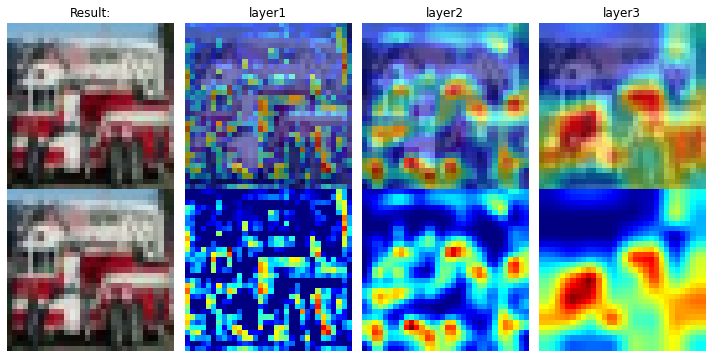

<Figure size 432x288 with 0 Axes>

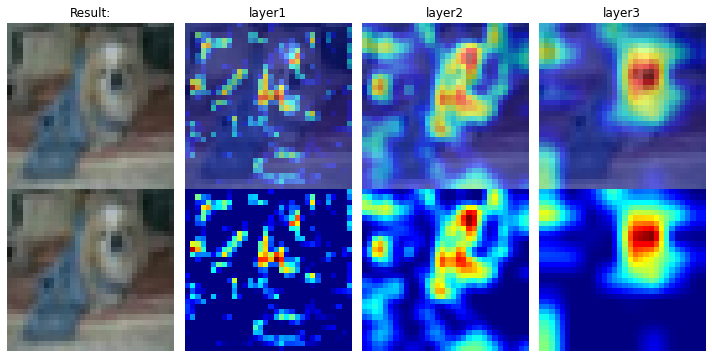

<Figure size 432x288 with 0 Axes>

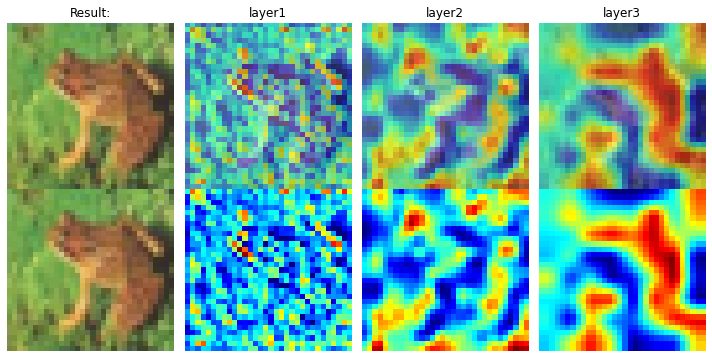

<Figure size 432x288 with 0 Axes>

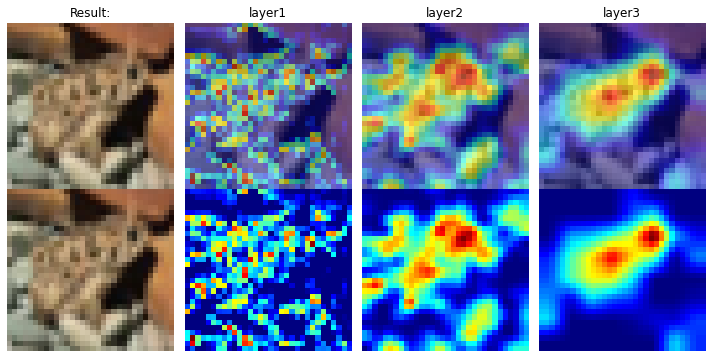

<Figure size 432x288 with 0 Axes>

In [17]:
import random

from gradCAMvisualize import GradCAMView

layers = ['layer1', 'layer2', 'layer3']

grad_cam = GradCAMView(
    net, layers, device, loader.mean, loader.std
)

images = [x['image'] for x in random.sample(test.correct_pred, 4)]
grad_cam(images, '/content/gdrive/My Drive/Colab Notebooks/S9/gradcam_images/')